<a href="https://colab.research.google.com/github/jagodek/machine-learning-basics/blob/main/alb4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test


In [36]:
import sklearn

In [37]:
sklearn.__version__

'1.2.2'

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib import ticker
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import ExtraTreesClassifier


In [39]:
workclass_vals = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
education_vals = ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool']
marital_status_vals = ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
occupation_vals = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
relation_vals = ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']
race_vals = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
native_country_vals = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

categorical_vals = [workclass_vals,education_vals,marital_status_vals,occupation_vals,relation_vals,race_vals,native_country_vals]



In [40]:
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
raw_data = pd.read_csv("adult.data",sep='\s*,\s*',names=column_names,index_col=False)
raw_test = pd.read_csv("adult.test",sep='\s*,\s*',names=column_names,index_col=False,skiprows=1)

<ipython-input-40-53980ef132da>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv("adult.data",sep='\s*,\s*',names=column_names,index_col=False)
<ipython-input-40-53980ef132da>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_test = pd.read_csv("adult.test",sep='\s*,\s*',names=column_names,index_col=False,skiprows=1)


In [41]:
raw_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [42]:
raw_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [43]:
raw_data = raw_data.replace("?",np.NaN)
raw_test = raw_test.replace("?",np.NaN)

In [44]:
raw_data.columns[raw_data.isna().sum() > 0] #missing values in columns:

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [45]:
raw_test.columns[raw_test.isna().sum() > 0]

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [46]:
raw_test.shape

(16281, 15)

In [47]:
raw_test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [48]:
raw_data.shape

(32561, 15)

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputed_data = raw_data.copy()
imputed_data[['workclass','occupation', 'native-country']] = pd.DataFrame(imputer.fit_transform(imputed_data[['workclass','occupation', 'native-country']]),index=imputed_data.index,columns=['workclass','occupation', 'native-country'])
imputed_test = raw_test.copy()
imputed_test[['workclass','occupation', 'native-country']] = pd.DataFrame(imputer.fit_transform(imputed_test[['workclass','occupation', 'native-country']]),index=imputed_test.index,columns=['workclass','occupation', 'native-country'])

In [50]:
imputed_test[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']] =  imputed_test[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].astype('float64')

In [51]:
imputed_test.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object

In [52]:
Y_adults = imputed_data[['income']].copy()
X_adults = imputed_data.drop(columns='income')
Y_adults_test = imputed_test[['income']].copy()
X_adults_test = imputed_test.drop(columns='income')

In [53]:
X_adults[['sex']] = X_adults[['sex']].replace('Male',1)
X_adults[['sex']] = X_adults[['sex']].replace('Female',0)
X_adults_test[['sex']] = X_adults_test[['sex']].replace('Male',1)
X_adults_test[['sex']] = X_adults_test[['sex']].replace('Female',0)

In [55]:
Y_adults[['income']] = Y_adults[['income']].replace('<=50K',0)
Y_adults[['income']] = Y_adults[['income']].replace('>50K',1)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('<=50K.',0)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('<=50K',0)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('>50K.',1)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('>50K',1)

In [59]:

new_cols = [b for a in [[c+'_'+n for n in v] for c,v in zip(categorical,categorical_vals)] for b in a]

oe = OneHotEncoder(categories =categorical_vals,handle_unknown='ignore',sparse_output=False)

Encoded = pd.DataFrame(oe.fit_transform(X_adults[categorical]),index=X_adults.index,columns=new_cols)
X_adults = X_adults.drop(columns=categorical)

X_adults = pd.concat([X_adults,Encoded],axis=1)


Encoded =pd.DataFrame(oe.fit_transform(X_adults_test[categorical]),index=X_adults_test.index,columns=new_cols)
X_adults_test = X_adults_test.drop(columns=categorical)

X_adults_test = pd.concat([X_adults_test,Encoded],axis=1)


In [60]:
Y_adults = Y_adults['income']
Y_adults_test = Y_adults_test['income']

In [61]:
X_adults.shape

(32561, 104)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,cross_validate

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [65]:




def estimate(estim,params):

    inner_cv = KFold(n_splits=4, shuffle=True, random_state=0)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=0)


    grid_search = GridSearchCV(
        estimator=estim,
        param_grid = params,
        scoring=['accuracy', 'precision', 'recall'],
        n_jobs=-1,
        refit='accuracy',
        cv=inner_cv,
        verbose = 4,
        return_train_score=True
    )

    
    score = grid_search.fit(X_adults,Y_adults)
    scoresDF = None

    for par, mean_score, std_score in zip(
    grid_search.cv_results_['params'], 
    grid_search.cv_results_['mean_test_accuracy'], 
    grid_search.cv_results_['std_test_accuracy']):
        arr = []
        estim.set_params(**par)
        y_pred = estim.fit(X_adults,Y_adults).predict(X_adults)
        scores = cross_validate(estim, X_adults, Y_adults, cv=outer_cv)
        print(f"Params: {par}")
        for i in par.values():
            arr.append(i)
        acc = accuracy_score(Y_adults, y_pred)
        arr.append(acc)
        print(f"Accuracy: {acc}")
        prec = precision_score(Y_adults, y_pred, average='macro')
        arr.append(prec)
        print(f"Precision: {prec}")
        rec = recall_score(Y_adults, y_pred, average='macro')
        arr.append(rec)
        print(f"Recall: {rec}")
        print(f"Mean score: {mean_score}, Standard deviation: {std_score}\n")
        arr.append(mean_score)
        arr.append(std_score)
        print(arr)
        
        if scoresDF is None:
            scoresDF = pd.DataFrame([arr],columns=["max_features","min_samples_leaf",'min_samples_split', 'n_estimators','accuracy','precission','recall','mean_score','standard_dev'])
        else:
            scoresDF =  pd.concat([scoresDF,pd.DataFrame([arr],columns=["max_features","min_samples_leaf",'min_samples_split', 'n_estimators','accuracy','precission','recall','mean_score','standard_dev'])],ignore_index=True)
    return grid_search,scoresDF


In [66]:
def scores_review(model,scores):
    print(f"model best params {model.best_params_}")
    print(f"model best score {model.best_score_}")
    print(f"test score {model.best_estimator_.score(X_adults_test,Y_adults_test)}")

    for i in ["max_features","min_samples_leaf",'min_samples_split', 'n_estimators']:
        df2 = pd.concat([scores[[i]],scores[['accuracy','precission','recall','mean_score','standard_dev']]],axis=1)
        df2 = df2.groupby(i).mean().reset_index()

        fig, ax = plt.subplots()

        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        df2.plot(ax=ax,x=i)

    importances = model.best_estimator_.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.best_estimator_.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=X_adults.columns.tolist())

    iss = []
    for i in range(len(std)):
        if forest_importances[i]<0.01:
            iss.append(i)
    std = np.delete(std,iss)
    forest_importances = forest_importances.drop(labels=[forest_importances.keys().tolist()[i] for i in iss])
    vals = forest_importances
    std_vals = std
    Z = [x for x in sorted(zip(vals,std_vals),reverse=False)]
    std_vals = [x for y,x in Z]
    forest_importances = forest_importances.sort_values(ascending=True)




    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(12)

    forest_importances.plot.barh(xerr=std_vals, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")



    
    
    result = permutation_importance(
    model.best_estimator_,X_adults_test , Y_adults_test, n_repeats=10, random_state=1, n_jobs=2
)

    forest_importances = pd.Series(result.importances_mean, index=X_adults.columns.tolist())
    std_vals = result.importances
    iss = []
    for i in range(len(std_vals)):
        if forest_importances[i]<0.005:
            iss.append(i)

    std_vals = np.delete(std_vals,iss)
    forest_importances = forest_importances.drop(labels=[forest_importances.keys().tolist()[i] for i in iss])
    vals = forest_importances
    Z = [x for x in sorted(zip(vals,std_vals),reverse=False)]
    std_vals = [x for y,x in Z]
    forest_importances = forest_importances.sort_values(ascending=True)

    fig, ax = plt.subplots()
    forest_importances.plot.barh(xerr=std_vals, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

    RocCurveDisplay.from_estimator(model.best_estimator_,X_adults_test,Y_adults_test)



In [74]:
params = {'n_estimators':[90,100,110,120],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3,5],'max_features':[2,5,9,10,11,12]}


Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Params: {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}
Accuracy: 0.9998771536500721
Precision: 0.9998755416514329
Recall: 0.9997884713329528
Mean score: 0.8460121923578501, Standard deviation: 0.0025895791164185543

[2, 1, 2, 90, 0.9998771536500721, 0.9998755416514329, 0.9997884713329528, 0.8460121923578501, 0.0025895791164185543]
Params: {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9999385768250361
Precision: 0.999959550198204
Recall: 0.9998724652467798
Mean score: 0.8460735231049075, Standard deviation: 0.00253114319015984

[2, 1, 2, 100, 0.9999385768250361, 0.999959550198204, 0.9998724652467798, 0.8460735231049075, 0.00253114319015984]
Params: {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}
Accuracy: 0.9999692884125181
Precision: 0.9999362407549095
Recall: 0.9999797734627831
Mean score: 

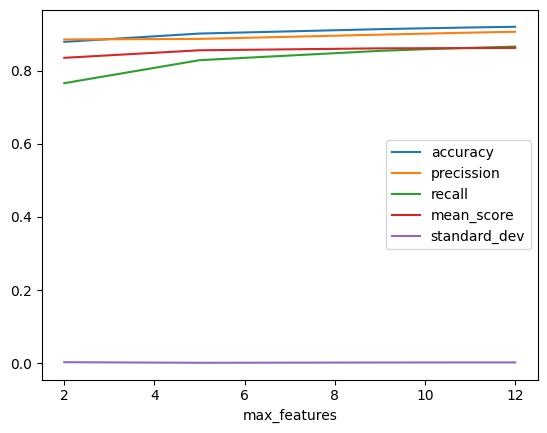

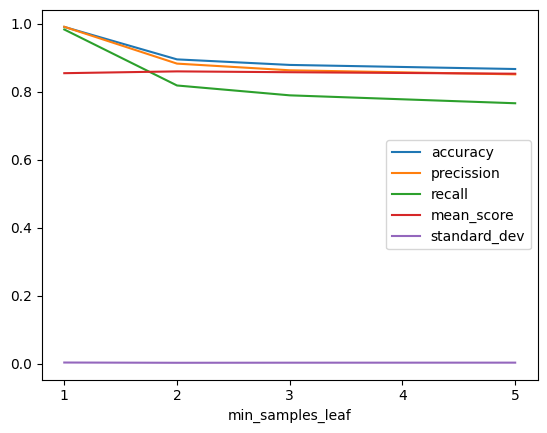

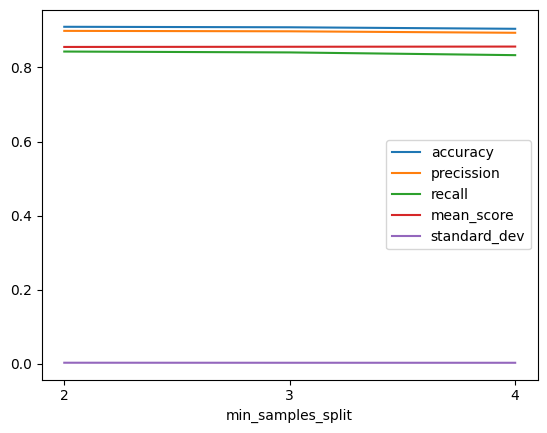

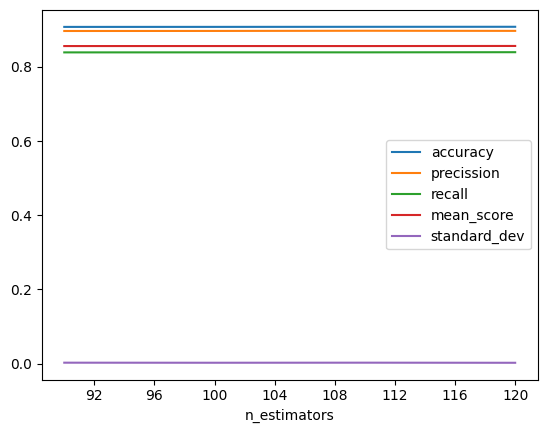

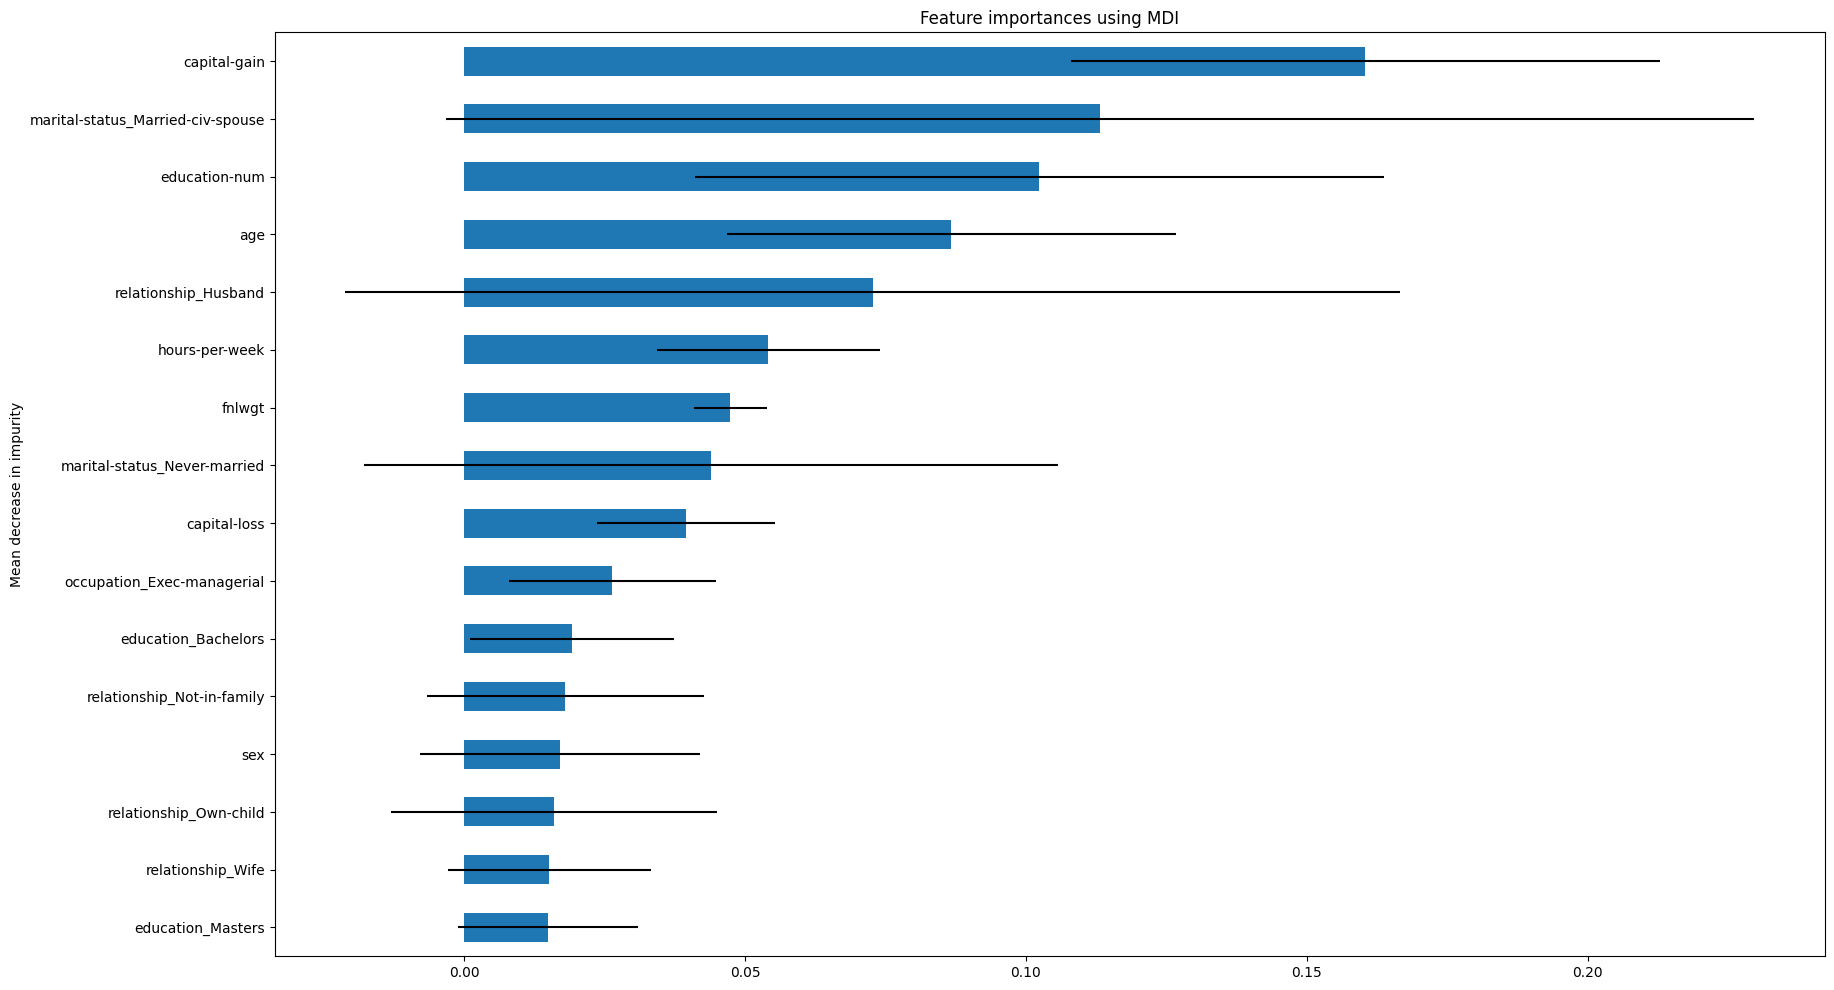

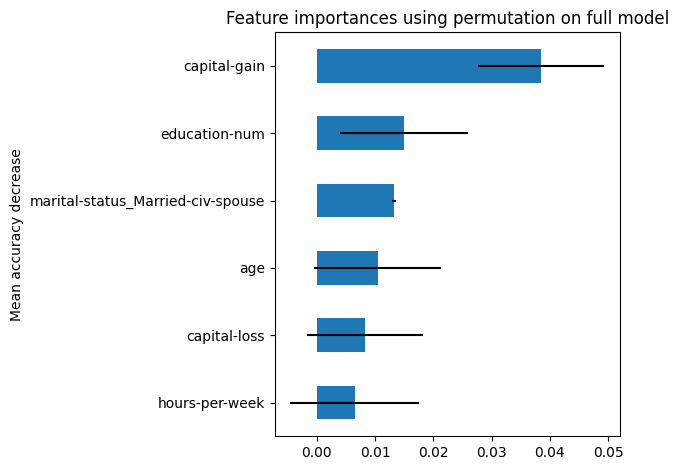

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Params: {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}
Accuracy: 0.9999692884125181
Precision: 0.9999797742809757
Recall: 0.9999362326233898
Mean score: 0.8271859127835053, Standard deviation: 0.001281561900490727

[2, 1, 2, 90, 0.9999692884125181, 0.9999797742809757, 0.9999362326233898, 0.8271859127835053, 0.001281561900490727]
Params: {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9999692884125181
Precision: 0.9999797742809757
Recall: 0.9999362326233898
Mean score: 0.8265103201044731, Standard deviation: 0.0026601153141419514

[2, 1, 2, 100, 0.9999692884125181, 0.9999797742809757, 0.9999362326233898, 0.8265103201044731, 0.0026601153141419514]
Params: {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}
Accuracy: 0.9999692884125181
Precision: 0.9999797742809757
Recall: 0.9999362326233898
Mean sco

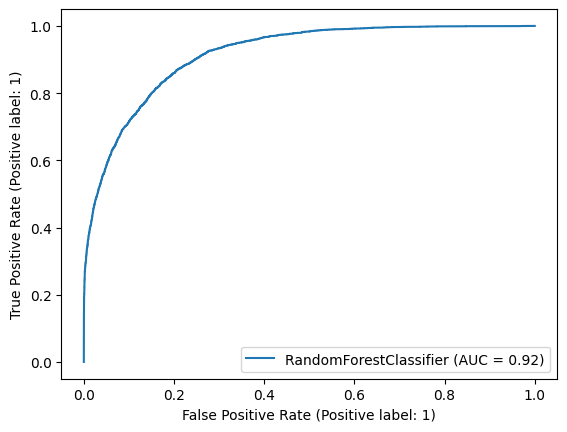

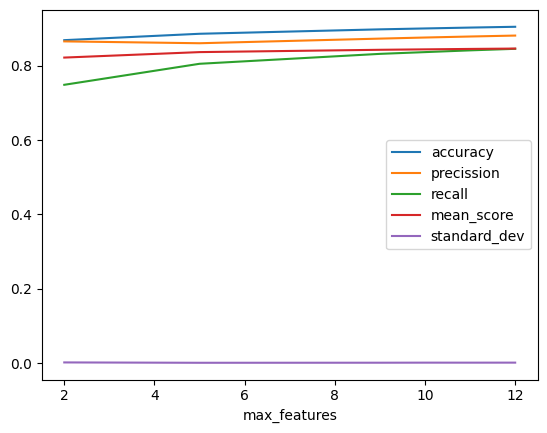

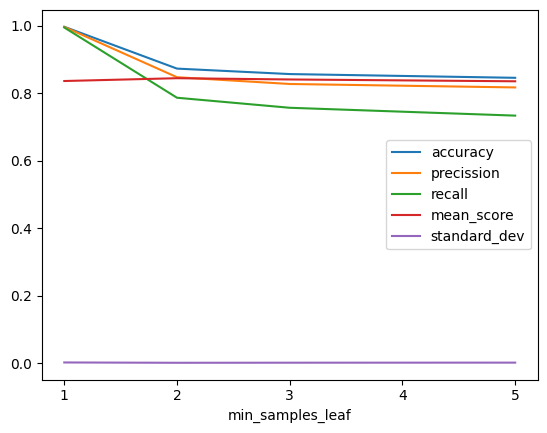

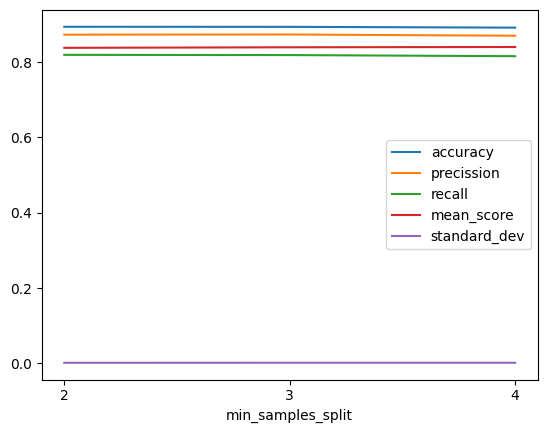

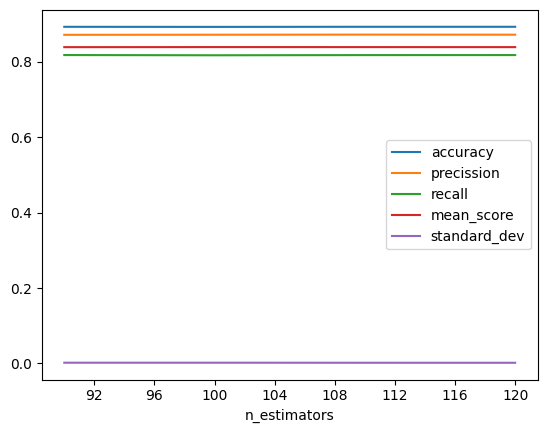

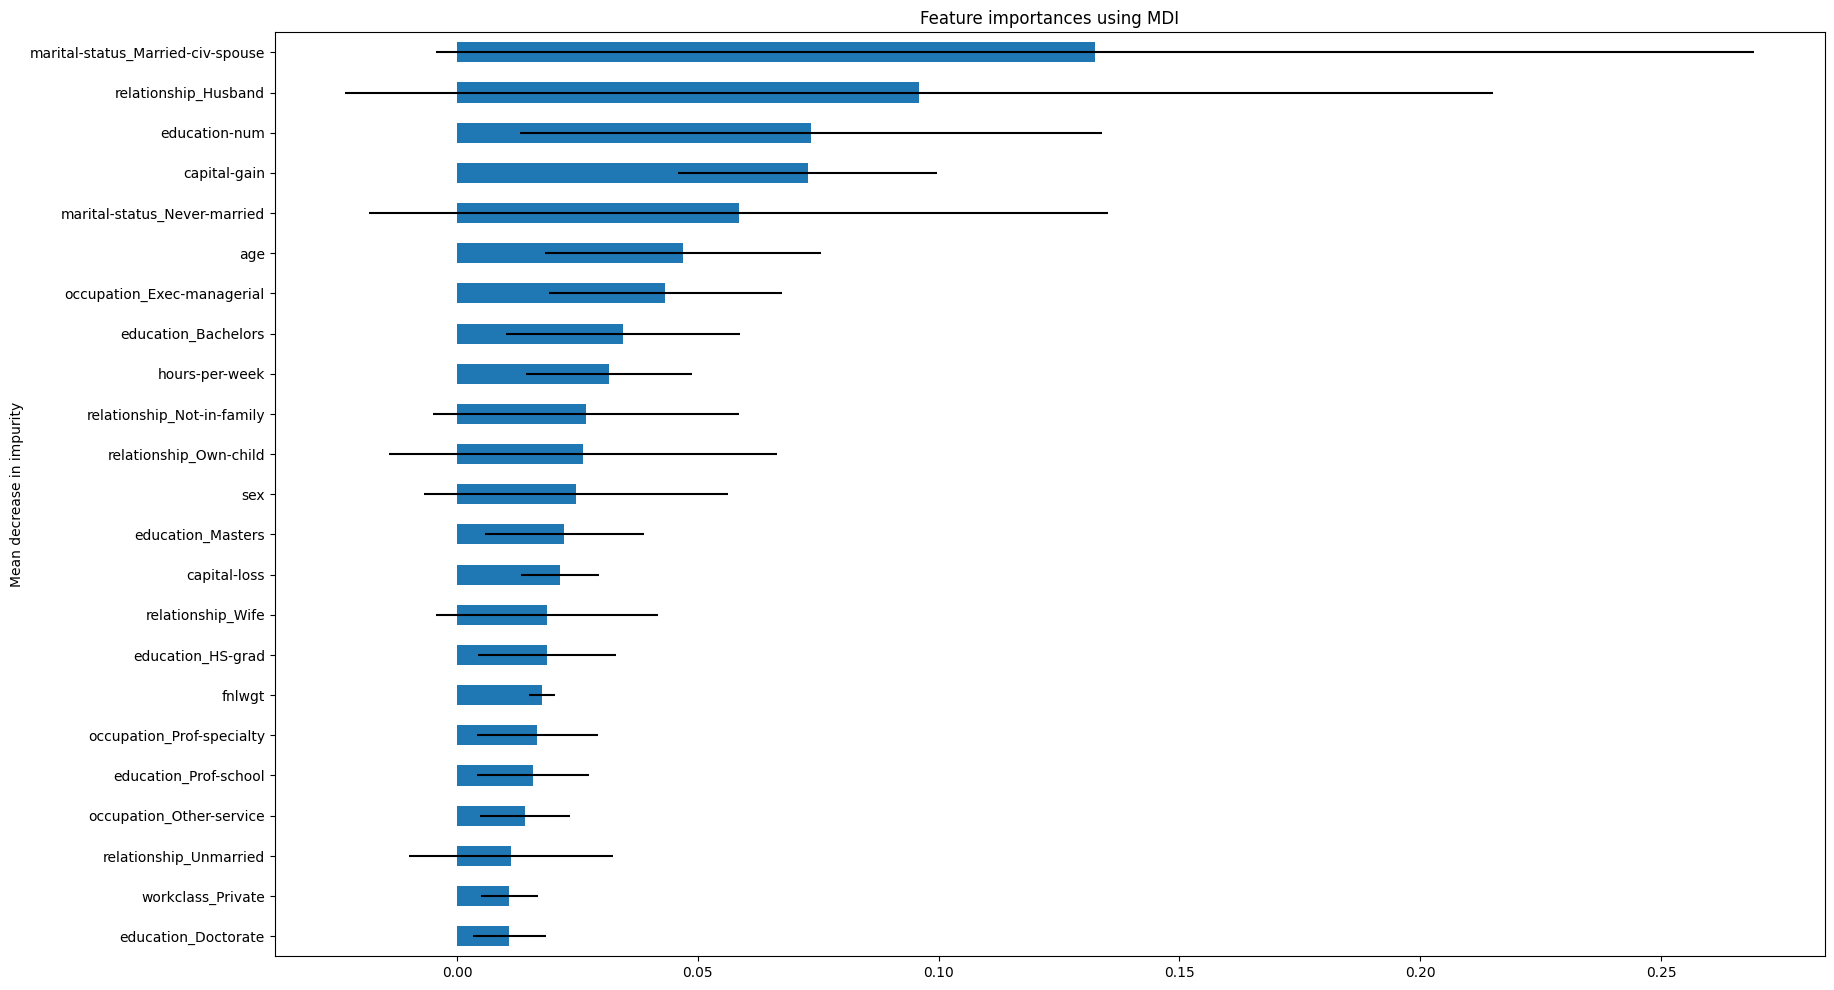

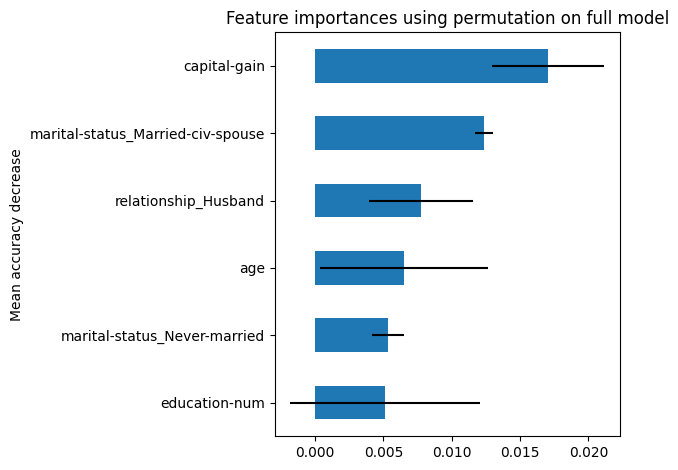

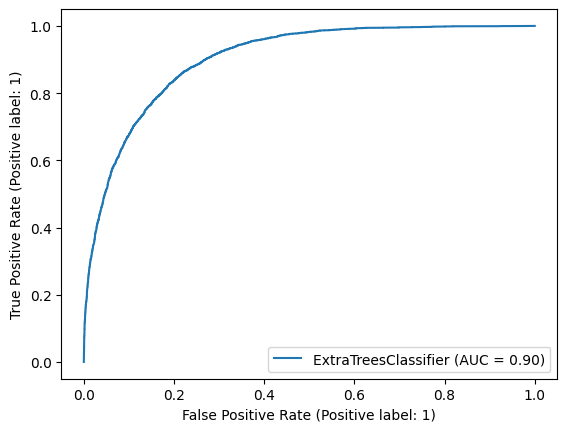

In [75]:
model,scoresDF = estimate(RandomForestClassifier(),params)
scores_review(model,scoresDF)
model,scoresDF = estimate(ExtraTreesClassifier(),params)
scores_review(model,scoresDF)